### NumPy

In [1]:
import numpy as np

NumPy - это библиотека, написанная частично в С, а частично в питоне; ее основная задача - обеспечивать математические вычисления, в том числе работу с матрицами. Дело в том, что мы можем реализовать матрицы (и тензоры более высокой мерности) стандартными средствами питона, и мы это делали, но такие вещи все равно будут работать медленнее, чем библиотеки в С, просто потому, что так реализованы списки в питоне. Список в питоне может хранить в себе меняющееся число элементов, которые могут быть разного размера: на самом деле он реализован в С как сложная структура, (structure), если кому интересен исходный код в С:

(фигурными скобками обозначается тело определяемого объекта, тип которого - struct (структура). ob_item - это список адресов элементов списка, allocated - количество размещенных в памяти элементов).

    typedef struct {
        PyObject_VAR_HEAD
        PyObject **ob_item;
        Py_ssize_t allocated;
    } PyListObject;
    
То есть, список питона - это связная структура, элементы которой могут валяться в памяти где угодно, а питон их отыскивает с помощью указателей (указатель в С - это переменная, которая содержит адрес объекта, такая переменная записывается со звездочкой: \*var, а массив в С определяется его стартовой позицией в памяти, потому что все элементы должны лежать рядышком и быть одинакового размера, поэтому массив записывается с двумя звездочками). В компьютерном мире так устроено, что, грубо говоря, пока там питон отыщет все элементы списка в разных уголках памяти, это займет время - а вот когда все элементы лежат рядышком, то времени уходит куда меньше. Матрицы (списки) в numpy реализованы таким образом, что все их элементы одинакового размера и хранятся в памяти вместе, поэтому они и работают гораздо быстрее. 

В связи с реализацией в С у Numpy есть и такая особенность, как немножко свои типы данных (они больше похожи на типы в С). Такие типы есть:

    i - integer
    b - boolean
    u - unsigned integer
    f - float
    c - complex float
    m - timedelta
    M - datetime
    O - object
    S - string
    U - unicode string
    V - fixed chunk of memory for other type (void)
    
(void в С ~ NoneType в питоне, а типы чисел более дробные: есть беззнаковые инты - у которых не хранится знак - есть инт и флоат разных размеров, 32 бита или 64: чем больше битов, тем больше чиселок может храниться в переменной такого типа). 

Эти буковки могут использоваться для задания типа данных в основном объекте NumPy - ndarray (n-dimensional array).

Здесь немного сложного: 

Центральное понятие для NumPy (а также для PyTorch, например, и вообще для МО и НС) - это тензор. Это понятие из математики, и тензор на самом деле != матрица, даже многомерная матрица. Тензор - это такой математический объект, который не изменяется при смене системы координат и представлен набором своих компонент и правилом преобразования компонент при смене базиса. Сложно? Если пытаться совсем упростить, то тензор - это всего лишь хранилище данных. Попытаться это понять можно [здесь](https://habr.com/ru/post/261563/). То есть, в тензорах мы храним что? числа, векторы, матрицы. У тензора есть ранг (rank) или измерение: это ровно то, о чем идет речь в NumPy, когда мы указываем измерение ndarray. Внутри тензора могут содержаться, например, n-мерные векторы. 

In [2]:
arr = np.array([[1, 2, 3], [4, 5, 6]])

In [3]:
arr.ndim

2

Вот, например, перед нами массив NumPy ранга 2, но при этом векторы, которые в нем содержатся, трехмерные. 

Тензор еще считается обобщенной матрицей: матрица - это же табличка чисел $n \cdot m$, а тензор бывает разных рангов. Для маленьких рангов есть отдельные термины:

- 0D - скаляр (число)
- 1D - вектор
- 2D - матрица
- 3D и выше - тензор 

В геометрии есть похожее соотношение: квадрат - куб - симплекс (любая фигура со сторонами одинаковой длины - 1 - в n-мерном пространстве называется n-мерный симплекс)

Итак, как задать массив в NumPy и проверить его мерность, можно понять из кода выше. Можно мерность задать при создании массива, при этом передавать ему список списков списков необязательно:

In [4]:
arr = np.array([1, 2, 3, 4, 5], ndmin=5)

In [5]:
arr

array([[[[[1, 2, 3, 4, 5]]]]])

В таком случае нумпай начнет вкладывать наши списки списков начиная с самого внутреннего измерения. 

In [6]:
arr = np.array([1, 2, 3], ndmin=2)

In [7]:
arr

array([[1, 2, 3]])

C рангом 2 должно быть интуитивно понятнее: я всего лишь сделала матрицу из одной строчки. Для чего это может быть нужно? Для broadcasting - когда нам нужно произвести какие-то вычисления с тензорами разных рангов, если один из тензоров превращается в тензор более высокого ранга, происходит он самый, broadcasting. Еще попозже это рассмотрим. 

В NumPy (как потом увидим, и в Pandas) измерения массива еще называются оси (axes). 

#### Тип данных

Возвращаясь к типу данных, можно его проверить следующим образом:

In [8]:
arr.dtype

dtype('int64')

А можно и явным образом указать с помощью буковки из списка выше:

In [9]:
arr = np.array([1, 2, 3, 4, 5], dtype='S')

In [10]:
arr

array([b'1', b'2', b'3', b'4', b'5'], dtype='|S1')

Строки в NumPy тоже немножечко особенные, поэтому не удивляйтесь буковке b - она означает "байтовая строка". 

Поменять тип данных в массиве можно так:

In [11]:
newarr = arr.astype('i')

In [12]:
newarr

array([1, 2, 3, 4, 5], dtype=int32)

#### Индексирование

Как можно обращаться к элементам массива? По индексам. Только они устроены немножко похитрее, чем стандартные питоньи (где нам пришлось  бы писать [0][0][0] для первого элемента первой строки первого... эээ, даже не знаю. Ранга. :)

In [13]:
arr = np.array([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])

In [14]:
arr

array([[[1, 2],
        [3, 4]],

       [[5, 6],
        [7, 8]]])

Вот у нас трехмерный массив. Допустим, мы хотим обратиться к четверке. Четверка находится в первой из двух матриц, во второй строке первой матрицы, на второй позиции этой строки. 

In [15]:
arr[0, 1, 1]

4

Супер. Также можно использовать срезы: например, можно получить всю вторую строку первой матрицы. 

In [16]:
arr[0, 1, :]

array([3, 4])

И даже весь второй столбец. 

In [17]:
arr[0, :, 1]

array([2, 4])

Можно, конечно, и только часть столбца взять, просто у меня супер-короткие столбцы. 

#### Форма

Форму матрицы можно изменять с помощью метода reshape. 

In [18]:
arr = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [19]:
arr.reshape(3, 3)

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

То есть, что передается в reshape? Столько цифр, сколько хотим измерений (я передала 2 - значит, я хочу матрицу), каждая цифра говорит о том, сколько я хочу элементов в каждом из этих измерений (три строки, три столбца). Tricky part здесь в том, что общее число элементов должно делиться на эти числа: то есть, все переданные числа, перемноженные друг на друга, должны давать число всех элементов ($ 3 \cdot 3 = 9$).

Если мы не можем так с ходу вычислить, сколько нам нужно элементов, можно попробовать один из них передать как минус единицу, тогда питон попробует вычислить его сам:

In [20]:
arr = np.array(range(1, 13))

In [21]:
arr.reshape(3, 2, -1)

array([[[ 1,  2],
        [ 3,  4]],

       [[ 5,  6],
        [ 7,  8]],

       [[ 9, 10],
        [11, 12]]])

-1 могло бы стоять вместо любой из цифр. Увы, если у вас не хватает элементов в массиве, чтобы разложить его на нужное количество, остается только добавлять эти элементы до того, как вы будете решейпить:

In [22]:
arr = np.array(range(1, 12))
arr

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [23]:
arr = np.append(arr, 0)  # можно было бы и None добавить, но лучше уж 0, чтобы numpy не пришлось менять тип данных на object

In [24]:
arr

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,  0])

Превратить любой массив в одномерный можно разными способами (ravel, flatten...), но в частности, можно просто отрешейпить в -1:

In [25]:
curled = np.array([[1, 2, 3], [4, 5, 6]])
curled

array([[1, 2, 3],
       [4, 5, 6]])

In [26]:
flat = curled.reshape(-1)
flat

array([1, 2, 3, 4, 5, 6])

#### view vs base

Также еще одна важная особенность массивов NumPy, о которой следует знать - это различие между base и view object. Для чего эта сложность? Это мы с вами на учебных занятиях возимся с массивчиками, в которых по три с половиной элемента, а в реальных программах массивы могут содержать миллиарды чисел. Случайно копировать такой массив, конечно, не улыбается, поэтому все библиотеки типа NumPy стараются избегать копирования, как только могут (ванильный питон тоже это делает - вспомните особенности копирования списков и других изменяемых объектов). 

view-массив - это такой массив, который собственных данных не содержит, а просто берет их из какого-то base-массива, но отображает по-своему. reshape как раз всегда возвращает такие вот "виды". Чтобы проверить, вид перед вами или база, можно обратиться к атрибуту:

In [27]:
arr.base

In [28]:
arr_view = arr.reshape(3, 4)

In [29]:
arr_view.base

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,  0])

Если массив оригинальный и владеет своими данными, то base вернет пустоту, в ином случае - хозяина данных. То есть, как легко догадаться, если мы будем изменять данные в массиве arr, данные в массиве arr_view тоже изменятся:

In [30]:
arr[2] = 123

In [31]:
arr_view

array([[  1,   2, 123,   4],
       [  5,   6,   7,   8],
       [  9,  10,  11,   0]])

Явным образом создать копию можно с помощью метода copy(). 

#### Итерирование

Как итерироваться по массивам? Можно тупо по индексам с помощью for, но для многомерных массивов это может быть сложновато, поэтому есть специальная функция:

In [32]:
for elem in np.nditer(arr):
    print(elem, end='\t')

1	2	123	4	5	6	7	8	9	10	11	0	

Есть и альтернатива enumerate для массивов:

In [33]:
for i, elem in np.ndenumerate(arr):
    print(i, elem, end='\t')

(0,) 1	(1,) 2	(2,) 123	(3,) 4	(4,) 5	(5,) 6	(6,) 7	(7,) 8	(8,) 9	(9,) 10	(10,) 11	(11,) 0	

#### Операции с массивами

Какие действия вообще возможно выполнять с массивами?

In [34]:
arr = np.array([1, 2, 3, 4, 5])

Все стандартные операции с числами будут произведены поэлементно:

In [35]:
arr + 1

array([2, 3, 4, 5, 6])

In [36]:
arr * 5

array([ 5, 10, 15, 20, 25])

In [37]:
arr - 4

array([-3, -2, -1,  0,  1])

In [38]:
arr ** 2

array([ 1,  4,  9, 16, 25])

In [39]:
arr / 5

array([0.2, 0.4, 0.6, 0.8, 1. ])

Логические операции между двумя массивами будут давать массив из булей:

In [40]:
a = np.array([1, 2, 3, 4])
b = np.array([4, 2, 2, 4])
a == b

array([False,  True, False,  True])

А если у нас два массива, и мы хотим их сложить?

In [41]:
a + b

array([5, 4, 5, 8])

Тут, правда, может возникнуть незадача...

In [42]:
a + arr

ValueError: operands could not be broadcast together with shapes (4,) (5,) 

Это и есть тот самый broadcasting: чтобы произвести операции между неравными по размеру массивами, NumPy пытается превратить их в равные, но иногда у него не получается. В манах по NumPy можно найти картинку, наглядно объясняющую broadcasting: 

<img src=numpy_broadcasting.png>

#### Конкатенация и разделение

Окей, а если мы хотим объединить два массива, при этом не складывая их? Тут есть несколько вариантов:

In [43]:
arr1 = np.array([[1, 2, 3]])
arr2 = np.array([[4, 5, 6]])

In [44]:
arr = np.concatenate((arr1, arr2))
arr

array([[1, 2, 3],
       [4, 5, 6]])

In [45]:
arrv = np.concatenate((arr1, arr2), axis=1)
arrv

array([[1, 2, 3, 4, 5, 6]])

In [46]:
np.stack((arr1, arr2))

array([[[1, 2, 3]],

       [[4, 5, 6]]])

Тут немного неочевидно - но stack возвращает массив большей мерности, когда склеивает, а concatenate - нет. 

Посплитить тоже можно:

In [47]:
np.array_split(arr, 2)

[array([[1, 2, 3]]), array([[4, 5, 6]])]

#### Поиск, сортировка, фильтрация

Можно искать по массиву элемент, который чему-нибудь равен:

In [48]:
arr = np.array([[1, 2, 3], [2, 3, 1]])
np.where(arr==3)

(array([0, 1]), array([2, 1]))

В этом случае вернутся индексы найденных элементов.

where умеет еще и заменять найденное:

In [49]:
np.where(arr == 3, 333, arr)

array([[  1,   2, 333],
       [  2, 333,   1]])

Сортировать массивы можно с помощью np.sort(), которая возвращает копию массива, а оригинальный массив оставляет нетронутым. 

Фильтрация массива - очень мощная и крутая штуковина. Например, мы можем наложить своего рода маску на массив:

In [50]:
arr = np.array([1, 2, 3, 4])
filt = [False, True, False, True]
arr[filt]

array([2, 4])

Подобная маска нам, конечно, вряд ли пригодится в реальной жизни, но можно задавать ее с помощью условия:

In [51]:
filt = arr % 2 == 1
arr[filt]

array([1, 3])

То есть, условие поэлементно применяется к массиву, и возвращаются только те элементы, которые прошли испытание. 

Можно и напрямую:

In [52]:
arr[arr % 2 == 1]

array([1, 3])

#### Рандомизация

В NumPy есть свой подмодуль random, у которого есть следующие вещи:.

In [53]:
np.random.randint(100, size=(3, 5))

array([[13, 79, 77, 45, 65],
       [79, 77, 69, 16, 49],
       [21, 15, 71, 13, 36]])

In [54]:
np.random.rand(5)

array([0.71523449, 0.2280614 , 0.602283  , 0.59748733, 0.8102286 ])

In [55]:
np.random.randn(3,2)

array([[ 1.13376665, -1.21084091],
       [ 0.65017331, -1.03202383],
       [ 0.03266352,  2.59801228]])

Первая функция генерирует массив заданного размера в диапазоне от 0 до 100, вторая - массив заданного размера, состоящий из рандомных чисел от 0 до 1, а третья - то же, что вторая, но числа могут быть отрицательными и не обязательно от 0 до 1. 

#### Диапазон

Можно генерировать массивы, состоящие из числовых диапазонов, как я это делала выше, но обычно используется своя функция NumPy:

In [56]:
np.arange(1, 13)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

Для более упорядоченной генерации чисел есть также такая функция:

In [57]:
np.linspace(1, 12, 15)

array([ 1.        ,  1.78571429,  2.57142857,  3.35714286,  4.14285714,
        4.92857143,  5.71428571,  6.5       ,  7.28571429,  8.07142857,
        8.85714286,  9.64285714, 10.42857143, 11.21428571, 12.        ])

В чем ее прикол? А она генерирует только такие точки, которые укладываются на прямую между точкой начала и конца (аргументы функции - старт, стоп, количество чисел). Если построить график, можно получить прямую:

In [58]:
import matplotlib.pyplot as plt

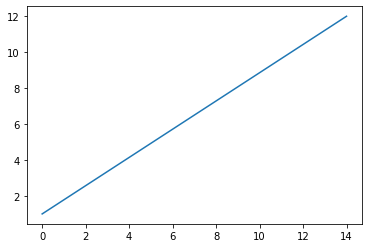

In [59]:
plt.plot(np.linspace(1, 12, 15))
plt.show()

### SciPy

SciPy создал тот же человек, что и NumPy, и это библиотека для научных вычислений, которая базируется на NumPy. Там есть, например, подмодуль linalg, в котором вы найдете функцию нормализации вектора, скалярное произведение векторов и т.п. Некоторые из этих вещей реализованы и в NumPy тоже, но в SciPy они реализованы еще лучше (==быстрее). 

Нам SciPy в основном не нужен, хотя там есть с чем поиграться. Что там есть? Подмодуль с кучей всяких констант, например (неинтересное), а также оптимизаторы (для нахождения минимальных корней уравнений) и инструменты для работы с разреженными матрицами. Разреженная матрица - это такая, в которой очень много нулей. 

In [60]:
from scipy.optimize import root

def func(x):
    return x ** 2 - 11 * x + 3
    
myroot = root(func, 0)
myroot.x

array([0.27984675])

то есть, вообще говоря, корень квадратного уравнения мы можем найти с помощью numpy (знали бы мы это в пятом классе...):

In [61]:
coef = [1, -11, 3]  # сохраняю коэффициенты своего квадратного уравнения
np.roots(coef)

array([10.72015325,  0.27984675])

Та-дам. Видим, что оптимизатор scipy нашел самый маленький из двух корней. 

Можно также минимизировать функцию:

In [62]:
from scipy.optimize import minimize

mn = minimize(func, 0)
print(mn.x, mn.fun)

[5.50000009] -27.249999999999993


Икс - это найденный корень, который дает минимальное значение функции, а само значение - fun.

Но это нам все, конечно, только баловства ради. Может пригодиться умение работать с разреженными матрицами; в scipy.sparse есть два класса - CSC (Comressed Sparce Column) и CSR (Compressed Sparce Row). В них можно в сжатом виде хранить разреженные матрицы:

In [63]:
from scipy.sparse import csr_matrix

arr = np.array([0, 0, 0, 0, 1, 0, 0, 0, 0, 3, 0, 0, 2])
sp = csr_matrix(arr)
print(sp, sp.data, sp.count_nonzero(), sep='\n')

  (0, 4)	1
  (0, 9)	3
  (0, 12)	2
[1 3 2]
3


Ну и в качестве бонуса - как можно построить гладкий график с помощью linspace и интерполяции scipy. На занятии мы с грехом пополам запилили подобный график для случайного набора чисел, а здесь привожу фрагмент рабочего кода для одного там проекта:

In [ ]:
from scipy.interpolate import make_interp_spline, BSpline

def drawplot(dct): 
    '''функция принимает словарь словарей, в котором для слова содержатся частоты по годам, т.е. 
    что-то вида {'word': {2001: 123, 2002: 345...}}
    '''
    plt.figure(figsize=(30, 20))
    plt.tick_params(axis='both', which='major', labelsize=20)
    colors = ['maroon', 'tomato', 'sandybrown', 'gold', 'darkkhaki', 
    'greenyellow', 'palegreen', 'seagreen', 'darkslategray', 'steelblue', 
    'midnightblue', 'slateblue', 'blueviolet', 'plum', 'palevioletred']
    for item, color in zip(dct.items(), colors):  # зип позволяет каждому слову приписать свой цвет
        lst = sorted(item[1].items())  # item[1] - это значение словаря; сортируем его по годам
        x = [e[0] for e in lst] # получаем годы
        y = [e[1] for e in lst] # получаем частоты для годов
        xnew = np.linspace(min(x), max(x), 300)  # создаем новые значения для х
        spl = make_interp_spline(x, y, k=3)  # интерполируем
        power_smooth = spl(xnew)  # сглаживаем
        plt.plot(xnew, power_smooth, color=color, label=item[0])
    plt.legend(prop={'size': 16})
    plt.show()

Получается что-то вроде этого:

<img src=graph.png>

Как можно видеть, сглаживание иногда создает артефакты на графике (странно задранные части или проседания ниже нуля - частота слова явно не могла быть отрицательной), зато красивенько!!! :D